6

In [3]:
a='a,b,c,d,e,f'[1:4]


In [4]:
a

',b,'

In [17]:
a='abcdefg'[0:-2]


In [18]:
a

'abcde'

In [21]:
a1=0
b1=5
c1=10
dp={'a':a1,'b':b1,'c':c1}
dp


{'a': 0, 'b': 5, 'c': 10}

In [26]:
from tensorflow.examples.tutorials.mnist import input_data

In [28]:
mnist=input_data.read_data_sets("MNIST_data/",one_hot=True)


Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [53]:
import tensorflow as tf
%matplotlib inline
import matplotlib.pyplot as plt
batch_xs,batch_ys=mnist.train.next_batch(1)

[[ 0.  0.  0.  0.  0.  1.  0.  0.  0.  0.]]


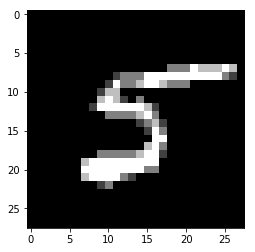

In [55]:
X=batch_xs
X=X.reshape([28,28])
plt.gray()
print (batch_ys)
plt.imshow(X)


In [75]:
x=tf.placeholder(tf.float32,[None,784])
w=tf.Variable(tf.zeros([784,10]))
b=tf.Variable(tf.zeros([10]))
y=tf.nn.softmax(tf.matmul(x,w)+b)
y_=tf.placeholder(tf.float32,[None,10])
cross_entropy=(tf.reduce_mean(-tf.reduce_sum(y_*tf.log(y),reduction_indices=[1])))
train_step=tf.train.GradientDescentOptimizer(0.5).minimize(cross_entropy)
sess=tf.InteractiveSession()
tf.global_variables_initializer().run()
for _ in range(1000):
    batch_x,batch_y=mnist.train.next_batch(100)
    sess.run(train_step,feed_dict={x:batch_x,y_:batch_y})
               

In [76]:
prediction=tf.equal(tf.argmax(y,1),tf.argmax(y_,1))
accuracy=tf.reduce_mean(tf.cast(prediction,tf.float32))
print(sess.run(accuracy,feed_dict={x:mnist.test.images,y_:mnist.test.labels}))

0.9193
